## ✒️ Code Modules and Helpful Functions

In [1]:
import numpy as np,pandas as pd 
import seaborn as sns,pylab as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler,RobustScaler
from sklearn.metrics import mean_squared_error,median_absolute_error,mean_absolute_error
from sklearn.metrics import r2_score,explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV,BayesianRidge
from sklearn.linear_model import HuberRegressor,TheilSenRegressor,RANSACRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
def regression(regressor,x_train,x_test,y_train):
    regressor.fit(x_train,y_train)    
    y_train_reg=regressor.predict(x_train)
    y_test_reg=regressor.predict(x_test)    
    return y_train_reg,y_test_reg
def scores(regressor,y_train,y_test,y_train_reg,y_test_reg):
    regressor_list.append(str(regressor))    
    ev_train_c=explained_variance_score(y_train,y_train_reg)
    ev_train.append(ev_train_c)
    ev_test_c=explained_variance_score(y_test,y_test_reg)
    ev_test.append(ev_test_c)    
    r2_train_c=r2_score(y_train,y_train_reg)
    r2_train.append(r2_train_c)
    r2_test_c=r2_score(y_test,y_test_reg)
    r2_test.append(r2_test_c)    
    mse_train_c=mean_squared_error(y_train,y_train_reg)
    mse_train.append(mse_train_c)
    mse_test_c=mean_squared_error(y_test,y_test_reg)
    mse_test.append(mse_test_c)
    mae_train_c=mean_absolute_error(y_train,y_train_reg)
    mae_train.append(mae_train_c)
    mae_test_c=mean_absolute_error(y_test,y_test_reg)
    mae_test.append(mae_test_c)     
    mdae_train_c=median_absolute_error(y_train,y_train_reg)
    mdae_train.append(mdae_train_c)
    mdae_test_c=median_absolute_error(y_test,y_test_reg)
    mdae_test.append(mdae_test_c)
    print(30*"_"); print(str(regressor)); print(30*"_")
    print("EV score. Train: ",ev_train_c)
    print("EV score. Test: ",ev_test_c); print(10*"-")
    print("R2 score. Train: ",r2_train_c)
    print("R2 score. Test: ",r2_test_c); print(10*"-")
    print("MSE score. Train: ",mse_train_c)
    print("MSE score. Test: ",mse_test_c); print(10*"-")
    print("MAE score. Train: ",mae_train_c)
    print("MAE score. Test: ",mae_test_c); print(10*"-")
    print("MdAE score. Train: ",mdae_train_c)
    print("MdAE score. Test: ",mdae_test_c)

## ✒️ Input Preprocessing

In [3]:
train=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')
train.tail().T[:20]

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [4]:
train.describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
# counting NaN values
train_nan=train.isnull().sum()[train.isnull().sum()!=0]
train_nan_list=train_nan[train_nan>100].index.values.tolist()
# deleting columns with a lot of NaN
for element in train_nan_list:
    del train[element]; del test[element]
train.isnull().sum()[train.isnull().sum()!=0]    

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [6]:
# Fill in NaN values
train_cat_nan_list=['Electrical','MasVnrType','BsmtQual','BsmtCond',
                    'BsmtExposure','BsmtFinType1','BsmtFinType2',
                    'GarageType','GarageFinish','GarageQual','GarageCond']
train_num_nan_list=['MasVnrArea','GarageYrBlt']
for x in train_cat_nan_list:
    most_common=pd.get_dummies(train[x]).sum()\
    .sort_values(ascending=False).index[0]
    train[x]=train[x].fillna(most_common)
for y in train_num_nan_list:
    train[y]=train[y].fillna(train[y].median())
train.isnull().sum()[train.isnull().sum()!=0]

Series([], dtype: int64)

In [7]:
test.isnull().sum()[test.isnull().sum()!=0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64

In [8]:
# Fill in NaN values
test_cat_nan_list=['MSZoning','Utilities','Exterior1st','Exterior2nd', 
                   'MasVnrType','BsmtQual','BsmtCond',
                   'BsmtExposure','BsmtFinType1','BsmtFinType2',
                   'KitchenQual','Functional','SaleType',
                   'GarageType','GarageFinish','GarageQual','GarageCond']
test_num_nan_list=['MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                   'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',
                   'GarageYrBlt','GarageCars','GarageArea']
for x in test_cat_nan_list:
    most_common=pd.get_dummies(test[x]).sum()\
    .sort_values(ascending=False).index[0]
    test[x]=test[x].fillna(most_common)
for y in test_num_nan_list:
    test[y]=test[y].fillna(test[y].median())
test.isnull().sum()[test.isnull().sum()!=0]    

Series([], dtype: int64)

In [9]:
# factorizing categorical features
object_list=train.dtypes[train.dtypes=='object']\
.index.values.tolist()
print(object_list)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [10]:
for element in object_list:
    train_categories=pd.factorize(train[element])
    test_categories=pd.factorize(test[element])
    train[element]=train_categories[0]
    test[element]=test_categories[0]

In [11]:
for element in test.columns.values.tolist():
    train[element]=train[element].astype('int')
    test[element]=test[element].astype('int')
(test.dtypes=='int64').sum()==len(test.dtypes)

True

In [12]:
# displaying correlation
pearson=train.corr(method='pearson')
corr_with_prices=pearson.iloc[-1][:-1]
corr_with_prices[abs(corr_with_prices).argsort()[::-1]][:30]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
Foundation     -0.429678
HeatingQC      -0.427649
BsmtFinSF1      0.386420
BsmtFinType1   -0.360407
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotShape        0.267759
ExterQual      -0.265015
LotArea         0.263843
CentralAir     -0.251328
Electrical     -0.231417
BsmtExposure    0.229632
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
PavedDrive     -0.208954
Name: SalePrice, dtype: float64

In [13]:
# creating the feature list
features_list=corr_with_prices[abs(corr_with_prices)\
.argsort()[::-1]][:30].index.values.tolist()
print(features_list)
target_train=train['SalePrice'].values
features_train=train[features_list].values
features_test=test[features_list].values

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'GarageYrBlt', 'Foundation', 'HeatingQC', 'BsmtFinSF1', 'BsmtFinType1', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotShape', 'ExterQual', 'LotArea', 'CentralAir', 'Electrical', 'BsmtExposure', 'BsmtFullBath', 'BsmtUnfSF', 'PavedDrive']


In [14]:
# data scaling
scale=RobustScaler()
features_train=scale.fit_transform(features_train)
features_test=scale.transform(features_test)

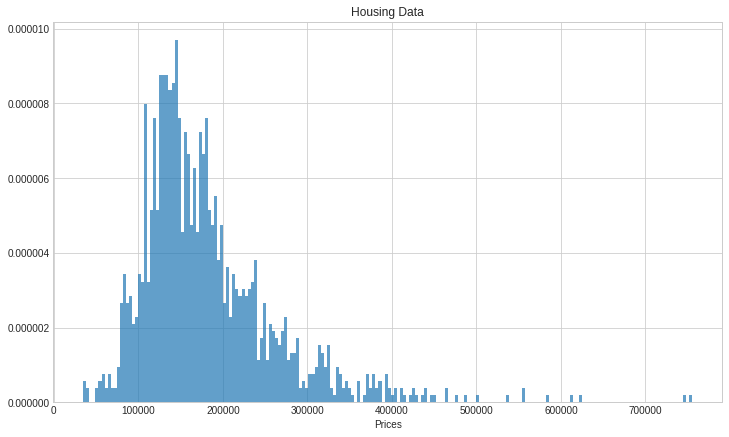

In [15]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,7))
plt.hist(target_train,bins=200,normed=True,alpha=.7)
plt.xlabel("Prices")
plt.title('Housing Data');

In [16]:
X_train,X_test,y_train,y_test=\
train_test_split(features_train,target_train,
                 test_size=.2,random_state=1)
X_train.shape,X_test.shape

((1168, 30), (292, 30))

## ✒️ Regressors

In [17]:
regressor_list,ev_train,ev_test=[],[],[]
r2_train,r2_test,mse_train,mse_test=[],[],[],[]
mae_train,mae_test,mdae_train,mdae_test=[],[],[],[]

### Adaptive Boosting and Random Forest Regressors

In [18]:
y_train_abr,y_test_abr=regression(AdaBoostRegressor(),
                                  X_train,X_test,y_train)
y_train_rfr,y_test_rfr=regression(RandomForestRegressor(),
                                  X_train,X_test,y_train)
scores(AdaBoostRegressor(),y_train,y_test,y_train_abr,y_test_abr)
scores(RandomForestRegressor(),y_train,y_test,y_train_rfr,y_test_rfr)

______________________________
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
______________________________
EV score. Train:  0.8767978984856204
EV score. Test:  0.8828462536583943
----------
R2 score. Train:  0.8612448337307865
R2 score. Test:  0.868975177249345
----------
MSE score. Train:  845326467.2060983
MSE score. Test:  934461616.7768822
----------
MAE score. Train:  22855.555003082663
MAE score. Test:  23238.240908674106
----------
MdAE score. Train:  18221.7317377407
MdAE score. Test:  18958.5733293909
______________________________
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=Fal

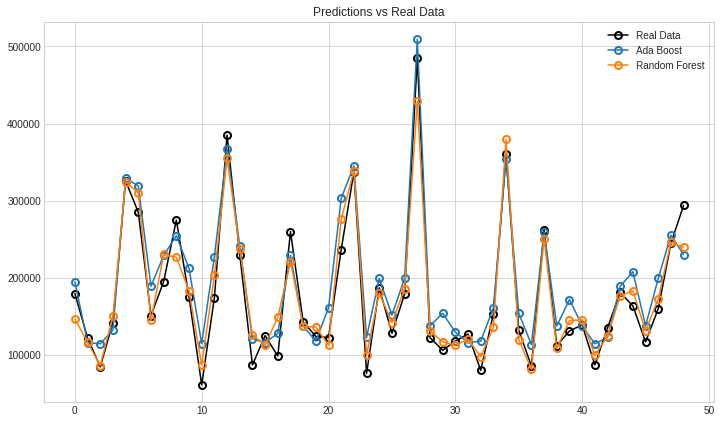

In [19]:
plt.figure(figsize=(12,7))
plt.plot(y_test[1:50],'-o',color='black',label='Real Data',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(y_test_abr[1:50],'-o',label='Ada Boost',
        markersize=7, markerfacecolor="None",markeredgewidth=2)
plt.plot(y_test_rfr[1:50],'-o',label='Random Forest',
        markersize=7, markerfacecolor="None",markeredgewidth=2)
plt.legend(); plt.title("Predictions vs Real Data");

### Gradient Boosting and Bagging Regressors

In [20]:
y_train_gbr,y_test_gbr=regression(GradientBoostingRegressor(),
                                  X_train,X_test,y_train)
y_train_br,y_test_br=regression(BaggingRegressor(),
                                X_train,X_test,y_train)
scores(GradientBoostingRegressor(),
       y_train,y_test,y_train_gbr,y_test_gbr)
scores(BaggingRegressor(),
       y_train,y_test,y_train_br,y_test_br)

______________________________
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
______________________________
EV score. Train:  0.9554156149381444
EV score. Test:  0.9233133845778411
----------
R2 score. Train:  0.9554156149381443
R2 score. Test:  0.9231722271070186
----------
MSE score. Train:  271617711.4715254
MSE score. Test:  547931326.0172573
----------
MAE score. Train:  11861.001117158812
MAE score. Test:  16182.114100744266
----------
MdAE score. Train:  8660.023993208997
MdAE score. Test:  10984.032853909805
______________________________
BaggingRegressor(base_estimator=None, 

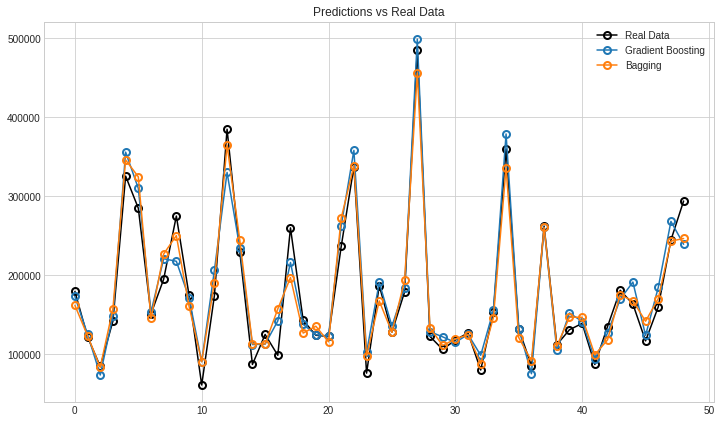

In [21]:
plt.figure(figsize=(12,7))
plt.plot(y_test[1:50],'-o',color='black',label='Real Data',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(y_test_gbr[1:50],'-o',label='Gradient Boosting',
        markersize=7, markerfacecolor="None",markeredgewidth=2)
plt.plot(y_test_br[1:50],'-o',label='Bagging',
        markersize=7, markerfacecolor="None",markeredgewidth=2)
plt.legend(); plt.title("Predictions vs Real Data"); 

### Decision Tree and Extra Trees Regressors

In [22]:
y_train_dtr,y_test_dtr=regression(DecisionTreeRegressor(),
                                  X_train,X_test,y_train)
y_train_etr,y_test_etr=regression(ExtraTreesRegressor(),
                                  X_train,X_test,y_train)
scores(DecisionTreeRegressor(),
       y_train,y_test,y_train_dtr,y_test_dtr)
scores(ExtraTreesRegressor(),
       y_train,y_test,y_train_etr,y_test_etr)

______________________________
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
______________________________
EV score. Train:  0.9999960474772025
EV score. Test:  0.8148845950611301
----------
R2 score. Train:  0.9999960474772025
R2 score. Test:  0.8143839118340066
----------
MSE score. Train:  24079.62328767123
MSE score. Test:  1323803430.5719178
----------
MAE score. Train:  6.421232876712328
MAE score. Test:  25335.12671232877
----------
MdAE score. Train:  0.0
MdAE score. Test:  17600.0
______________________________
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_

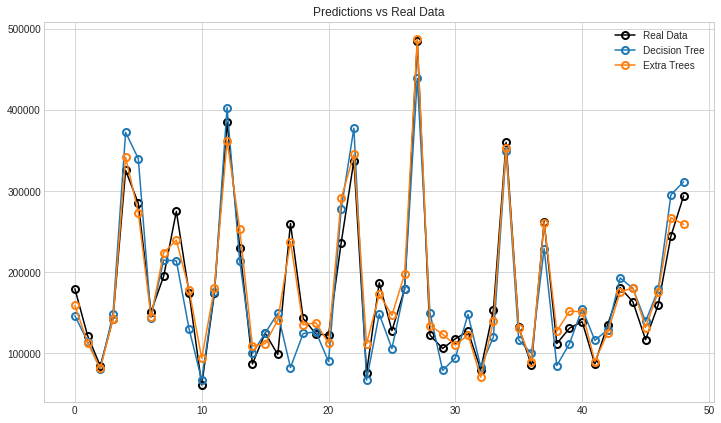

In [23]:
plt.figure(figsize=(12,7))
plt.plot(y_test[1:50],'-o',color='black',label='Real Data',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(y_test_dtr[1:50],'-o',label='Decision Tree',
         markersize=7, markerfacecolor="None",markeredgewidth=2)
plt.plot(y_test_etr[1:50],'-o',label='Extra Trees',
        markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.legend(); plt.title("Predictions vs Real Data");

### K Neighbors and Radius Neighbors Regressors

In [24]:
y_train_knr,y_test_knr=regression(KNeighborsRegressor(n_neighbors=3), 
                                  X_train,X_test,y_train)
y_train_rnr,y_test_rnr=regression(RadiusNeighborsRegressor(radius=6.35), 
                                  X_train,X_test,y_train)
scores(KNeighborsRegressor(n_neighbors=2),
       y_train,y_test,y_train_knr,y_test_knr)
scores(RadiusNeighborsRegressor(radius=6.35),
       y_train,y_test,y_train_rnr,y_test_rnr)

______________________________
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')
______________________________
EV score. Train:  0.887220867321815
EV score. Test:  0.8095536627782136
----------
R2 score. Train:  0.8863597770015167
R2 score. Test:  0.8080246574155675
----------
MSE score. Train:  692320803.7777779
MSE score. Test:  1369157273.0011415
----------
MAE score. Train:  16200.215753424658
MAE score. Test:  21821.70205479452
----------
MdAE score. Train:  10591.666666666672
MdAE score. Test:  13620.833333333328
______________________________
RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, p=2, radius=6.35, weights='uniform')
______________________________
EV score. Train:  0.4836533513302611
EV score. Test:  0.5228610342072915
----------
R2 score. Train:  0.48016077592577067
R2 score. Test:  0.5224227991185

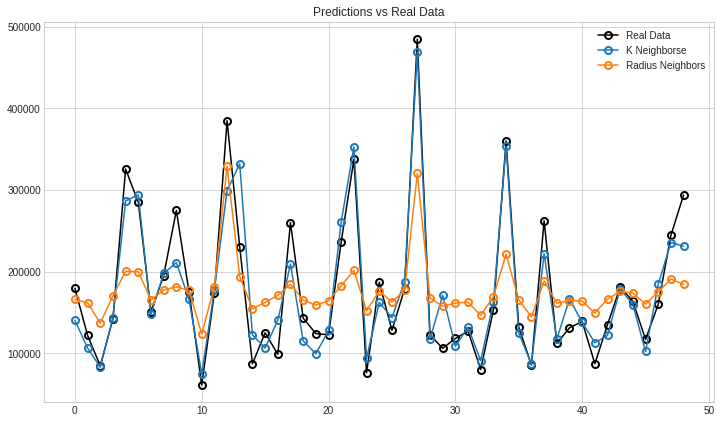

In [25]:
plt.figure(figsize=(12,7))
plt.plot(y_test[1:50],'-o',color='black',label='Real Data',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(y_test_knr[1:50],'-o',label='K Neighborse',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(y_test_rnr[1:50],'-o',label='Radius Neighbors',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.legend(); plt.title("Predictions vs Real Data");

## ✒️ Evaluation Metrics

In [26]:
df_results=pd.DataFrame({'regressor':regressor_list,
                         'ev_train':ev_train,'ev_test':ev_test,
                         'r2_train':r2_train,'r2_test':r2_test,
                         'mse_train':mse_train,'mse_test':mse_test,
                         'mae_train':mae_train,'mae_test':mae_test,
                         'mdae_train':mdae_train,'mdae_test':mdae_test})

In [27]:
print(df_results['regressor'][5])

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)


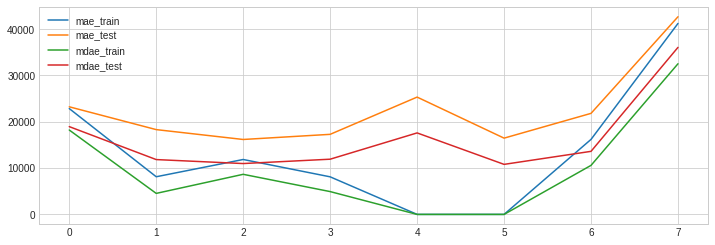

In [28]:
df_results[['mae_train','mae_test','mdae_train','mdae_test']]\
.plot(figsize=(12,4));

## ✒️ Tuning Algorithms

### Gradient Boosting Regressor

In [29]:
param_grid_gbr={'learning_rate':[.1,.05],'max_depth':[4,5], 
                'n_estimators':range(120,241,30)}
gridsearch_gbr=\
GridSearchCV(GradientBoostingRegressor(),param_grid_gbr,n_jobs=5)\
.fit(X_train,y_train)
gridsearch_gbr.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 210}

In [30]:
regressor_gbr=\
GradientBoostingRegressor(learning_rate=.05,max_depth=4,
                          n_estimators=gridsearch_gbr.best_params_['n_estimators'],
                          min_samples_leaf=1,min_samples_split=2)
y_train_gbr_best,y_test_gbr_best=\
regression(regressor_gbr,X_train,X_test,y_train)
scores(regressor_gbr,y_train,y_test,y_train_gbr_best,y_test_gbr_best)

______________________________
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=210, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
______________________________
EV score. Train:  0.9775621311421855
EV score. Test:  0.9187034481761323
----------
R2 score. Train:  0.9775621311421855
R2 score. Test:  0.9185892160142051
----------
MSE score. Train:  136696347.40957746
MSE score. Test:  580617101.6251898
----------
MAE score. Train:  8690.567001713185
MAE score. Test:  15806.88482873217
----------
MdAE score. Train:  6563.535501142811
MdAE score. Test:  10439.273826717326


### Bagging Regressor

In [31]:
param_grid_br=\
{'base_estimator':[DecisionTreeRegressor(),RandomForestRegressor(),
                   GradientBoostingRegressor()],
'n_estimators':range(90,151,30)}
gridsearch_br=GridSearchCV(BaggingRegressor(),param_grid_br,n_jobs=5)\
.fit(X_train,y_train)
gridsearch_br.best_params_

{'base_estimator': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False), 'n_estimators': 90}

In [32]:
regressor_br=\
BaggingRegressor(GradientBoostingRegressor(),
                 n_estimators=gridsearch_br.best_params_['n_estimators'])
y_train_br_best,y_test_br_best=\
regression(regressor_br,X_train,X_test,y_train)
scores(regressor_br,y_train,y_test,y_train_br_best,y_test_br_best)

______________________________
BaggingRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=90, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
______________________________
EV score. Train:  0.9450622962458725
EV score. Test:  0.9141583156740997
----------
R2 score. Train:  0.9450613104896924
R2 score. Test:  0.9141581012514854
----------
MSE score. Train:  334698372.4308735
MSE score. Test:  612219561.2077897
----------
MA

### Random Forest Regressor

In [33]:
param_grid_rfr={'n_estimators':range(150,301,30)}
gridsearch_rfr=GridSearchCV(RandomForestRegressor(),param_grid_rfr,n_jobs=5)\
.fit(X_train,y_train)
gridsearch_rfr.best_params_

{'n_estimators': 150}

In [34]:
regressor_rfr=\
RandomForestRegressor(n_estimators=gridsearch_rfr.best_params_['n_estimators'])
y_train_rfr_best,y_test_rfr_best=\
regression(regressor_rfr,X_train,X_test,y_train)
scores(regressor_rfr,y_train,y_test,y_train_rfr_best,y_test_rfr_best)

______________________________
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
______________________________
EV score. Train:  0.9765995813628779
EV score. Test:  0.9052575863947259
----------
R2 score. Train:  0.9765995179877246
R2 score. Test:  0.9052101516403601
----------
MSE score. Train:  142560794.83179253
MSE score. Test:  676035831.1703328
----------
MAE score. Train:  6798.90948630137
MAE score. Test:  16506.03618721461
----------
MdAE score. Train:  4233.323333333334
MdAE score. Test:  11040.089999999997


### Extra Trees Regressor

In [35]:
param_grid_etr={'n_estimators':range(150,301,30)}
gridsearch_etr=GridSearchCV(ExtraTreesRegressor(),param_grid_etr,n_jobs=10)\
.fit(X_train,y_train)
gridsearch_etr.best_params_

{'n_estimators': 270}

In [36]:
regressor_etr=\
ExtraTreesRegressor(n_estimators=gridsearch_etr.best_params_['n_estimators'])
y_train_etr_best,y_test_etr_best=\
regression(regressor_etr,X_train,X_test,y_train)
scores(regressor_etr,y_train,y_test,y_train_etr_best,y_test_etr_best)

______________________________
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=270, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
______________________________
EV score. Train:  0.9999960474772025
EV score. Test:  0.9098908502685563
----------
R2 score. Train:  0.9999960474772025
R2 score. Test:  0.9098649410464864
----------
MSE score. Train:  24079.62328767123
MSE score. Test:  642838136.6961923
----------
MAE score. Train:  6.421232876712328
MAE score. Test:  15825.556367326231
----------
MdAE score. Train:  0.0
MdAE score. Test:  9870.481481481482


## ✒️ Predictions

In [37]:
reg=GradientBoostingRegressor(learning_rate=.05,max_depth=4,
                              n_estimators=210, 
                              min_samples_leaf=1,
                              min_samples_split=2)
reg.fit(features_train,target_train)
target_train_predict=reg.predict(features_train)
target_test_predict=reg.predict(features_test)

In [38]:
target_predict=["{0:.2f}".format(x) for x in target_test_predict]
submission=pd.DataFrame({"Id": test['Id'],"SalePrice":target_predict})
print(submission[0:5])
submission.to_csv('kaggle_housing.csv',index=False)

     Id  SalePrice
0  1461  128584.19
1  1462  156402.03
2  1463  183817.56
3  1464  185274.13
4  1465  185997.03


## ✒️  Features' Importance

In [39]:
df_importance=pd.DataFrame(columns=range(30))
df_importance.loc[0]=\
AdaBoostRegressor().fit(X_train,y_train).feature_importances_
df_importance.loc[1]=\
RandomForestRegressor().fit(X_train,y_train).feature_importances_
df_importance.loc[2]=\
GradientBoostingRegressor().fit(X_train,y_train).feature_importances_
df_importance.loc[3]=\
DecisionTreeRegressor().fit(X_train,y_train).feature_importances_
df_importance.loc[4]=\
ExtraTreesRegressor().fit(X_train,y_train).feature_importances_

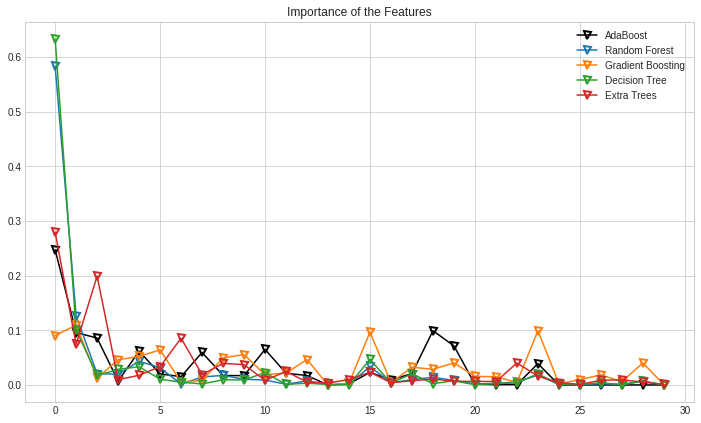

In [40]:
plt.figure(figsize=(12,7))
plt.plot(df_importance.loc[0],'-v',color='black',label='AdaBoost',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(df_importance.loc[1],'-v',label='Random Forest',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(df_importance.loc[2],'-v',label='Gradient Boosting',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(df_importance.loc[3],'-v',label='Decision Tree',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(df_importance.loc[4],'-v',label='Extra Trees',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.legend(); plt.title("Importance of the Features");

In [41]:
column_pairs=dict(zip(list(range(30)),list(features_list)))
index_pairs=dict(zip(list(range(5)), 
                     list(['AdaBoost','Random Forest','Gradient Boosting', 
                           'Decision Tree','Extra Trees'])))
df_importance2=df_importance.rename(index=index_pairs,columns=column_pairs)

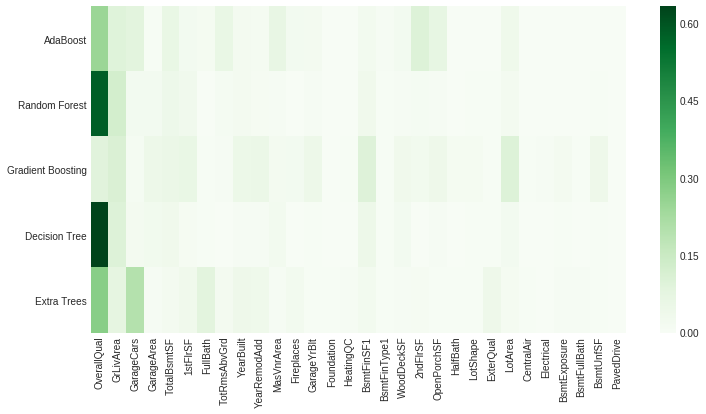

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(df_importance2,cmap='Greens');